# 0. EDA och filhantering
- a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder, glöm inte att lägga till den till .gitignore.

In [20]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from random import sample
import os
import numpy as np
import shutil

# Paths

In [21]:
original_data = 'original_data/train'
experiment_small_data = 'experiment_small_data'

b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

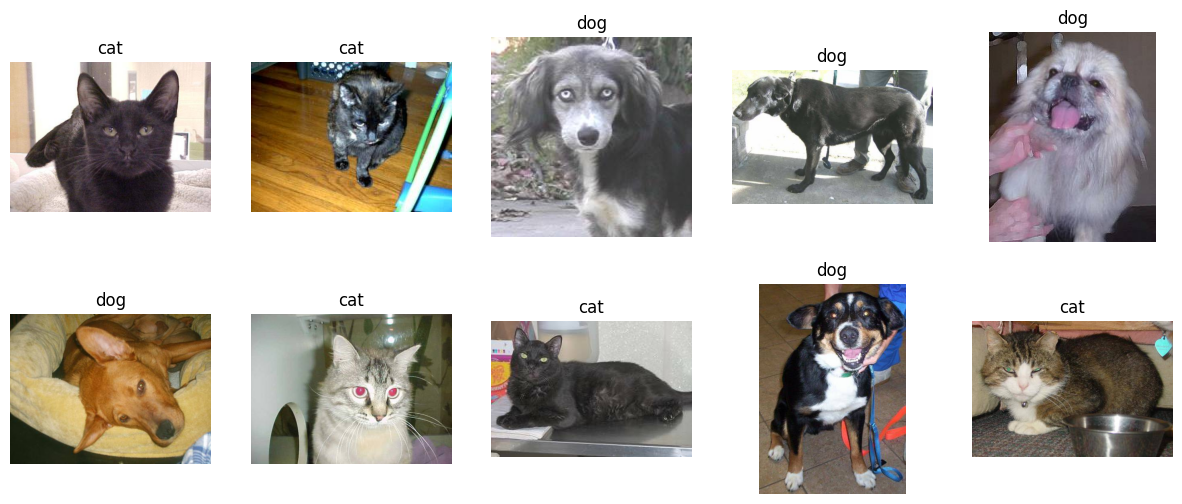

In [22]:
# Create list with all images
all_images = [os.path.join(original_data, f) for f in os.listdir(original_data) if os.path.isfile(os.path.join(original_data, f))]

# Pick 10 random pictures from the list
random_images = sample(all_images, 10)

def load_image(image_path):
    img = cv2.imread(image_path)
    # Makes images less blue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def plot_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Load images
images = [load_image(image_path) for image_path in random_images]
labels = [os.path.basename(image_path).split('.')[0] for image_path in random_images]

plot_images(images, labels)

c) Skapa folderstrukturen nedan med Python:

├── experiment_small_data<br>
│   ├── test<br>
│   ├── train<br>
│   └── val<br>
├── experiment_tiny_data<br>
│   ├── test<br>
│   ├── train<br>
│   └── val<br>
├── lab.ipynb<br>
└── original_data<br>
    ├── test<br>
    └── train<br>

In [23]:
folders = [
    ('experiment_small_data', ['test', 'train', 'val']),
    ('experiment_tiny_data', ['test', 'train', 'val']),
    ('original_data', [])
]

for folder, subfolders in folders:
    for subfolder in subfolders:
        Path(folder, subfolder).mkdir(parents=True, exist_ok=True)

d) Nu ska du göra train|val|test split med följande splits:

- train - 1600 (800 dogs, 800 cats)
- val - 400 (200 dogs, 200 cats)
- test - 500 (250 dogs, 250 cats)

# Hur blir det om man kör cellen 2 gånger?

In [24]:
def copy_files(files, subdir):
    for file in files:
        # Copy files from 'original_folder' to 'target_dir'
        shutil.copy(file, os.path.join(experiment_small_data, subdir, os.path.basename(file)))

# Read files and shuffle
dog_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('dog')]
cat_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('cat')]
np.random.shuffle(dog_files)
np.random.shuffle(cat_files)

train_dogs, val_dogs, test_dogs = 800, 200, 250
train_cats, val_cats, test_cats = 800, 200, 250

# Sampling without replacement for dogs 
dogs_train = dog_files[:train_dogs]
dogs_val = dog_files[train_dogs:train_dogs+val_dogs]
dogs_test = dog_files[train_dogs+val_dogs:train_dogs+val_dogs+test_dogs]

copy_files(dogs_train, 'train')
copy_files(dogs_val, 'val')
copy_files(dogs_test, 'test')

# Sampling without replacement for cats
cats_train = cat_files[:train_cats]
cats_val = cat_files[train_cats:train_cats+val_cats]
cats_test = cat_files[train_cats+val_cats:train_cats+val_cats+test_cats]

copy_files(cats_train, 'train')
copy_files(cats_val, 'val')
copy_files(cats_test, 'test')

e) Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1.
- plotta några bilder med deras respektive labels och kontrollera att det är korrekt.
- skapa lämplig plot för att kontrollera att dataseten är balanserade
- skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex:
[0, 0, ... 0, 1, 1, ..., 1]

In [25]:
def get_image_filenames(directory):
    # Returns list with filenames that ends with '.jpg'  
    return [file for file in os.listdir(directory) if file.endswith('.jpg')]

# Create lists with filenames
train_list = get_image_filenames(os.path.join(experiment_small_data, 'train'))
test_list = get_image_filenames(os.path.join(experiment_small_data, 'test'))
val_list = get_image_filenames(os.path.join(experiment_small_data, 'val'))

# Print number of files in each dataset 
print(f"Train files: {len(train_list)}")
print(f"Test files: {len(test_list)}")
print(f"Val files: {len(val_list)}")

Train files: 1600
Test files: 500
Val files: 400
